In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Downloaded from https://myfwp.mt.gov/fwpPub/harvestReports
df = pd.read_csv('fwpHarvestEstimatesReport.csv')
df = df[df.Hunters > 0]
df = df[df.Residency == 'SUM']
df

,License Year,Hunting District,Residency,Hunters,Days,Days per Hunter,Total Harvest,Bulls,Cows,Calves,Bow,Rifle,Spike Bull Elk,Less than 6 Points,6 or More Points
2,2004,100,SUM,2075,15318,7,124,68,49,7,17,107,0,38,27
5,2004,101,SUM,1459,10765,7,86,49,34,3,10,76,0,32,17
8,2004,102,SUM,1437,8420,6,35,16,14,6,3,33,0,14,2
11,2004,103,SUM,2559,16597,7,139,68,61,10,21,118,0,43,24
14,2004,104,SUM,1584,10977,7,124,94,27,3,15,109,1,59,34
17,2004,109,SUM,280,1907,7,29,7,21,1,0,29,0,4,3
20,2004,110,SUM,1060,6190,6,85,71,14,0,6,79,0,54,17
23,2004,120,SUM,990,5657,6,40,33,7,0,10,30,0,23,10
26,2004,121,SUM,2593,20905,8,348,191,151,7,75,273,5,109,77
29,2004,122,SUM,1761,10872,6,67,34,30,3,11,56,0,24,11


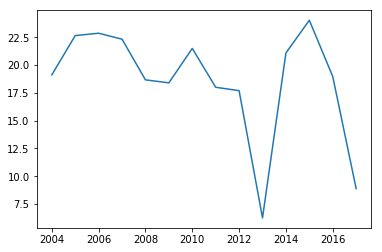

              Hunters  Total Harvest  Success Rate
License Year                                      
2004           365869          69947     19.118045
2005           346495          78494     22.653718
2006           342672          78358     22.866765
2007           359321          80240     22.331008
2008           374147          69864     18.672875
2009           366398          67430     18.403485
2010           345341          74249     21.500198
2011           354949          63909     18.005122
2012           348347          61663     17.701602
2013           322666          20176      6.252905
2014           366170          77217     21.087746
2015           386052          92786     24.034586
2016           386919          73411     18.973222
2017           341928          30390      8.887836


In [14]:
def divide_two_cols(df_sub):
    hunters = float(df_sub['Hunters'].sum())
    if hunters <= 0.0:
        hunters += 1.0
    #print(hunters)
    harvest = float(df_sub['Total Harvest'].sum())
    if harvest <= 0.0:
        harvest += 1.0
    df_sub['Success Rate'] = harvest / hunters * 100
    return df_sub
grouped = pd.DataFrame(df.groupby(['License Year'])['Hunters', 'Total Harvest'].sum())
grouped_with_rate = grouped.groupby(['License Year']).apply(divide_two_cols)
#print(grouped_with_rate.keys())
plt.plot(grouped_with_rate.index, grouped_with_rate['Success Rate'])
plt.show()
print(grouped_with_rate)